In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_path = '/content/drive/MyDrive/DataSet'
flag_types = os.listdir(dataset_path)
print (flag_types)

print("Types of rooms found: ", len(dataset_path))


['Nazli', 'Dimnit', 'Buzgulu', 'Ala_Idris', 'Ak']
Types of rooms found:  30


In [6]:
flags = []

for item in flag_types:
 # Get all the file names
 all_flags = os.listdir(dataset_path + '/' +item)
 #print(all_shoes)

 # Add them to the list
 for flag in all_flags:
    flags.append((item, str(dataset_path + '/' +item) + '/' + flag))
    print(flags[:1])

[('Nazli', '/content/drive/MyDrive/DataSet/Nazli/Nazli (91).png')]
[('Nazli', '/content/drive/MyDrive/DataSet/Nazli/Nazli (91).png')]
[('Nazli', '/content/drive/MyDrive/DataSet/Nazli/Nazli (91).png')]
[('Nazli', '/content/drive/MyDrive/DataSet/Nazli/Nazli (91).png')]
[('Nazli', '/content/drive/MyDrive/DataSet/Nazli/Nazli (91).png')]
[('Nazli', '/content/drive/MyDrive/DataSet/Nazli/Nazli (91).png')]
[('Nazli', '/content/drive/MyDrive/DataSet/Nazli/Nazli (91).png')]
[('Nazli', '/content/drive/MyDrive/DataSet/Nazli/Nazli (91).png')]
[('Nazli', '/content/drive/MyDrive/DataSet/Nazli/Nazli (91).png')]
[('Nazli', '/content/drive/MyDrive/DataSet/Nazli/Nazli (91).png')]
[('Nazli', '/content/drive/MyDrive/DataSet/Nazli/Nazli (91).png')]
[('Nazli', '/content/drive/MyDrive/DataSet/Nazli/Nazli (91).png')]
[('Nazli', '/content/drive/MyDrive/DataSet/Nazli/Nazli (91).png')]
[('Nazli', '/content/drive/MyDrive/DataSet/Nazli/Nazli (91).png')]
[('Nazli', '/content/drive/MyDrive/DataSet/Nazli/Nazli (91).pn

In [7]:
# Build a dataframe
flags_df = pd.DataFrame(data=flags, columns=['flag type', 'image'])
print(flags_df.head())
print(flags_df.tail())

  flag type                                              image
0     Nazli  /content/drive/MyDrive/DataSet/Nazli/Nazli (91...
1     Nazli  /content/drive/MyDrive/DataSet/Nazli/Nazli (43...
2     Nazli  /content/drive/MyDrive/DataSet/Nazli/Nazli (70...
3     Nazli  /content/drive/MyDrive/DataSet/Nazli/Nazli (27...
4     Nazli  /content/drive/MyDrive/DataSet/Nazli/Nazli (72...
    flag type                                          image
495        Ak  /content/drive/MyDrive/DataSet/Ak/Ak (21).png
496        Ak  /content/drive/MyDrive/DataSet/Ak/Ak (50).png
497        Ak  /content/drive/MyDrive/DataSet/Ak/Ak (43).png
498        Ak  /content/drive/MyDrive/DataSet/Ak/Ak (86).png
499        Ak  /content/drive/MyDrive/DataSet/Ak/Ak (70).png


In [8]:
# Let's check how many samples for each category are present
print("Total number of leafs in the dataset: ", len(flags_df))

Total number of leafs in the dataset:  500


In [9]:
flag_count = flags_df['flag type'].value_counts()

print("leaf in each category: ")
print(flag_count)

leaf in each category: 
flag type
Nazli        100
Dimnit       100
Buzgulu      100
Ala_Idris    100
Ak           100
Name: count, dtype: int64


In [10]:
import cv2
path = '/content/drive/MyDrive/DataSet/'

im_size = 224
images = []
labels = []

for i in flag_types:
    data_path = path + str(i)
    filenames = [i for i in os.listdir(data_path) ]
    print(filenames)
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

['Nazli (91).png', 'Nazli (43).png', 'Nazli (70).png', 'Nazli (27).png', 'Nazli (72).png', 'Nazli (64).png', 'Nazli (89).png', 'Nazli (26).png', 'Nazli (65).png', 'Nazli (59).png', 'Nazli (35).png', 'Nazli (67).png', 'Nazli (53).png', 'Nazli (42).png', 'Nazli (39).png', 'Nazli (49).png', 'Nazli (62).png', 'Nazli (22).png', 'Nazli (11).png', 'Nazli (16).png', 'Nazli (44).png', 'Nazli (85).png', 'Nazli (8).png', 'Nazli (69).png', 'Nazli (47).png', 'Nazli (9).png', 'Nazli (25).png', 'Nazli (46).png', 'Nazli (29).png', 'Nazli (77).png', 'Nazli (84).png', 'Nazli (71).png', 'Nazli (79).png', 'Nazli (36).png', 'Nazli (66).png', 'Nazli (28).png', 'Nazli (7).png', 'Nazli (1).png', 'Nazli (61).png', 'Nazli (20).png', 'Nazli (83).png', 'Nazli (2).png', 'Nazli (60).png', 'Nazli (3).png', 'Nazli (41).png', 'Nazli (82).png', 'Nazli (6).png', 'Nazli (45).png', 'Nazli (48).png', 'Nazli (38).png', 'Nazli (14).png', 'Nazli (12).png', 'Nazli (75).png', 'Nazli (30).png', 'Nazli (19).png', 'Nazli (56).png'

In [11]:
images = np.array(images)
images.shape

(500, 224, 224, 3)

In [12]:
images = images.astype('float32') / 255.0
images.shape

(500, 224, 224, 3)

In [13]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y = flags_df['flag type'].values
print(y)

['Nazli' 'Nazli' 'Nazli' 'Nazli' 'Nazli']


In [14]:
y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [15]:
y = y.reshape(-1,1)
onehotencoder = OneHotEncoder()  #Converted  scalar output into vector output where the correct class will be 1 and other will be 0
Y = onehotencoder.fit_transform(y).toarray()
print(Y.shape)

(500, 5)


In [16]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)

train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.05, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(475, 224, 224, 3)
(475, 5)
(25, 224, 224, 3)
(25, 5)


In [17]:
from __future__ import print_function
import warnings

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Input, Conv2D, MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import get_file
from tensorflow.keras import backend as K
from tensorflow.keras.applications.imagenet_utils import decode_predictions, preprocess_input

In [18]:
def VGGupdated(input_tensor=None,classes=5):

    img_rows, img_cols = 224, 224
    img_channels = 3

    img_dim = (img_rows, img_cols, img_channels)

    img_input = Input(shape=img_dim)

    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv4')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv4')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv4')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)


    # Classification block
    x = Flatten(name='flatten')(x)
    x = Dense(4096, activation='relu', name='fc1')(x)
    x = Dense(4096, activation='relu', name='fc2')(x)
    x = Dense(1000, activation='relu', name='fc3')(x)
    x = Dense(classes, activation='softmax', name='predictions')(x)

    # Create model.


    model = Model(inputs = img_input, outputs = x, name='VGGdemo')


    return model

In [19]:
model = VGGupdated(classes = 5)

In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
custom_history = model.fit(train_x, train_y, epochs = 10, batch_size = 5, validation_data=(test_x, test_y))

Epoch 1/10
95/95 [==============================] - 28s 143ms/step - loss: 1.7747 - accuracy: 0.1937 - val_loss: 1.6105 - val_accuracy: 0.2400
Epoch 2/10
95/95 [==============================] - 13s 142ms/step - loss: 1.6104 - accuracy: 0.2000 - val_loss: 1.6161 - val_accuracy: 0.0800
Epoch 3/10
95/95 [==============================] - 14s 143ms/step - loss: 1.6101 - accuracy: 0.1937 - val_loss: 1.6197 - val_accuracy: 0.0800
Epoch 4/10
95/95 [==============================] - 14s 144ms/step - loss: 1.6098 - accuracy: 0.1726 - val_loss: 1.6197 - val_accuracy: 0.0800
Epoch 5/10
95/95 [==============================] - 14s 147ms/step - loss: 1.6097 - accuracy: 0.1895 - val_loss: 1.6203 - val_accuracy: 0.1200
Epoch 6/10
95/95 [==============================] - 14s 149ms/step - loss: 1.6097 - accuracy: 0.1832 - val_loss: 1.6207 - val_accuracy: 0.0800
Epoch 7/10
95/95 [==============================] - 14s 152ms/step - loss: 1.6096 - accuracy: 0.1874 - val_loss: 1.6225 - val_accuracy: 0.0800

In [22]:
custom_history.history??
print(custom_history.history['accuracy'])
print(custom_history.history['val_accuracy'])

[0.19368420541286469, 0.20000000298023224, 0.19368420541286469, 0.17263157665729523, 0.1894736886024475, 0.18315789103507996, 0.18736842274665833, 0.2063157856464386, 0.1915789544582367, 0.17263157665729523]
[0.23999999463558197, 0.07999999821186066, 0.07999999821186066, 0.07999999821186066, 0.11999999731779099, 0.07999999821186066, 0.07999999821186066, 0.07999999821186066, 0.07999999821186066, 0.07999999821186066]


In [23]:
evaluation = model.evaluate(test_x, test_y)
print("Validation Loss:", evaluation[0])
print("Validation Accuracy:", evaluation[1])

1/1 [==============================] - 6s 6s/step - loss: 1.6177 - accuracy: 0.0800
Validation Loss: 1.6176828145980835
Validation Accuracy: 0.07999999821186066


In [24]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping,CSVLogger

base_model = VGG19(weights='imagenet', include_top = False, input_shape = (224, 224, 3))

for layer in base_model.layers:
    layer.trainable = True

x = Flatten()(base_model.output)
x = Dense(1024, activation = 'relu')(x)
x = Dense(len(flag_types), activation = 'softmax')(x)

model_post = Model(inputs = base_model.input, outputs = x)
model_post.compile(optimizer=Adam(), loss = 'categorical_crossentropy', metrics = ['accuracy'])

80134624/80134624 [==============================] - 0s 0us/step


In [25]:
base_history = model_post.fit(train_x, train_y, epochs = 10, batch_size = 10, validation_data=(test_x, test_y))

Epoch 1/10
48/48 [==============================] - 24s 207ms/step - loss: 2.2888 - accuracy: 0.1768 - val_loss: 3.0972 - val_accuracy: 0.1200
Epoch 2/10
48/48 [==============================] - 10s 199ms/step - loss: 1.6602 - accuracy: 0.1979 - val_loss: 1.6142 - val_accuracy: 0.1600
Epoch 3/10
48/48 [==============================] - 10s 202ms/step - loss: 1.6120 - accuracy: 0.1705 - val_loss: 1.6050 - val_accuracy: 0.4000
Epoch 4/10
48/48 [==============================] - 10s 199ms/step - loss: 1.6101 - accuracy: 0.1389 - val_loss: 1.6113 - val_accuracy: 0.1200
Epoch 5/10
48/48 [==============================] - 9s 193ms/step - loss: 1.6097 - accuracy: 0.1811 - val_loss: 1.6147 - val_accuracy: 0.1200
Epoch 6/10
48/48 [==============================] - 9s 192ms/step - loss: 1.6098 - accuracy: 0.1895 - val_loss: 1.6164 - val_accuracy: 0.0800
Epoch 7/10
48/48 [==============================] - 9s 194ms/step - loss: 1.6096 - accuracy: 0.2063 - val_loss: 1.6156 - val_accuracy: 0.0800
Ep

In [26]:
print(base_history.history['accuracy'])
print(base_history.history['val_accuracy'])

[0.1768421083688736, 0.19789473712444305, 0.17052631080150604, 0.13894736766815186, 0.18105262517929077, 0.1894736886024475, 0.2063157856464386, 0.1894736886024475, 0.1915789544582367, 0.18315789103507996]
[0.11999999731779099, 0.1599999964237213, 0.4000000059604645, 0.11999999731779099, 0.11999999731779099, 0.07999999821186066, 0.07999999821186066, 0.11999999731779099, 0.07999999821186066, 0.11999999731779099]


In [27]:
evaluation_x = model_post.evaluate(test_x, test_y)
print("Validation Loss:", evaluation_x[0])
print("Validation Accuracy:", evaluation_x[1])

1/1 [==============================] - 0s 217ms/step - loss: 1.6208 - accuracy: 0.1200
Validation Loss: 1.6208484172821045
Validation Accuracy: 0.11999999731779099


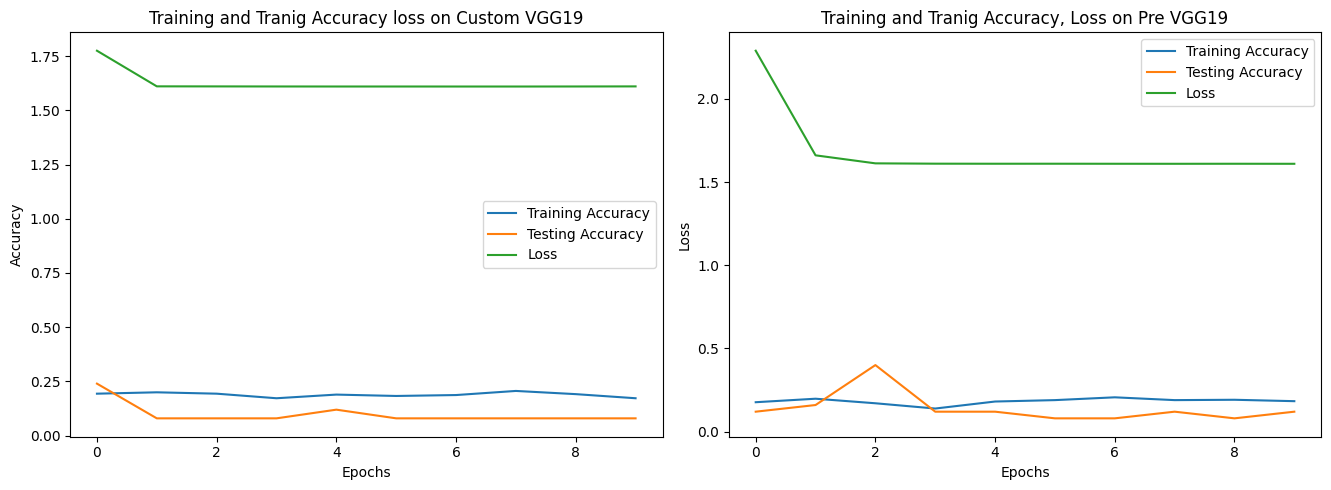

In [28]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.plot(custom_history.history['accuracy'],  label='Training Accuracy')
plt.plot(custom_history.history['val_accuracy'], label='Testing Accuracy')
plt.plot(custom_history.history['loss'], label='Loss')
plt.title('Training and Tranig Accuracy loss on Custom VGG19')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 3, 2)
plt.plot(base_history.history['accuracy'],  label='Training Accuracy')
plt.plot(base_history.history['val_accuracy'], label='Testing Accuracy')
plt.plot(base_history.history['loss'], label='Loss')
plt.title('Training and Tranig Accuracy, Loss on Pre VGG19')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [29]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

In [30]:
y_pred1 = model.predict(test_x)
y_pred2 = model_post.predict(test_x)

1/1 [==============================] - 0s 268ms/step


In [47]:
print(y_pred2)
print(test_y)

[[0.19256352 0.20342048 0.20174286 0.202993   0.19928016]
 [0.19256352 0.20342048 0.20174286 0.202993   0.19928016]
 [0.19256352 0.20342048 0.20174286 0.202993   0.19928016]
 [0.19256352 0.20342048 0.20174286 0.202993   0.19928016]
 [0.19256352 0.20342048 0.20174286 0.202993   0.19928016]
 [0.19256352 0.20342048 0.20174286 0.202993   0.19928016]
 [0.19256352 0.20342048 0.20174286 0.202993   0.19928016]
 [0.19256352 0.20342048 0.20174286 0.202993   0.19928016]
 [0.19256352 0.20342048 0.20174286 0.202993   0.19928016]
 [0.19256352 0.20342048 0.20174286 0.202993   0.19928016]
 [0.19256352 0.20342048 0.20174286 0.202993   0.19928016]
 [0.19256352 0.20342048 0.20174286 0.202993   0.19928016]
 [0.19256352 0.20342048 0.20174286 0.202993   0.19928016]
 [0.19256352 0.20342048 0.20174286 0.202993   0.19928016]
 [0.19256352 0.20342048 0.20174286 0.202993   0.19928016]
 [0.19256352 0.20342048 0.20174286 0.202993   0.19928016]
 [0.19256352 0.20342048 0.20174286 0.202993   0.19928016]
 [0.19256352 0

In [62]:
y_pred_classes1 = np.argmax(y_pred1, axis=1)
print(y_pred_classes1)
y_true1 = np.argmax(test_y, axis=1)
report = classification_report(y_true1, y_pred_classes1, target_names = flag_types)

print(report)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
              precision    recall  f1-score   support

       Nazli       0.00      0.00      0.00        10
      Dimnit       0.00      0.00      0.00         3
     Buzgulu       0.00      0.00      0.00         4
   Ala_Idris       0.08      1.00      0.15         2
          Ak       0.00      0.00      0.00         6

    accuracy                           0.08        25
   macro avg       0.02      0.20      0.03        25
weighted avg       0.01      0.08      0.01        25



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
y_pred_classes2 = np.argmax(y_pred2, axis=1)
print(y_pred_classes2)
y_true2 = np.argmax(test_y, axis=1)
report = classification_report(y_true2, y_pred_classes2, target_names = flag_types)

print(report)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
              precision    recall  f1-score   support

       Nazli       0.00      0.00      0.00        10
      Dimnit       0.12      1.00      0.21         3
     Buzgulu       0.00      0.00      0.00         4
   Ala_Idris       0.00      0.00      0.00         2
          Ak       0.00      0.00      0.00         6

    accuracy                           0.12        25
   macro avg       0.02      0.20      0.04        25
weighted avg       0.01      0.12      0.03        25



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


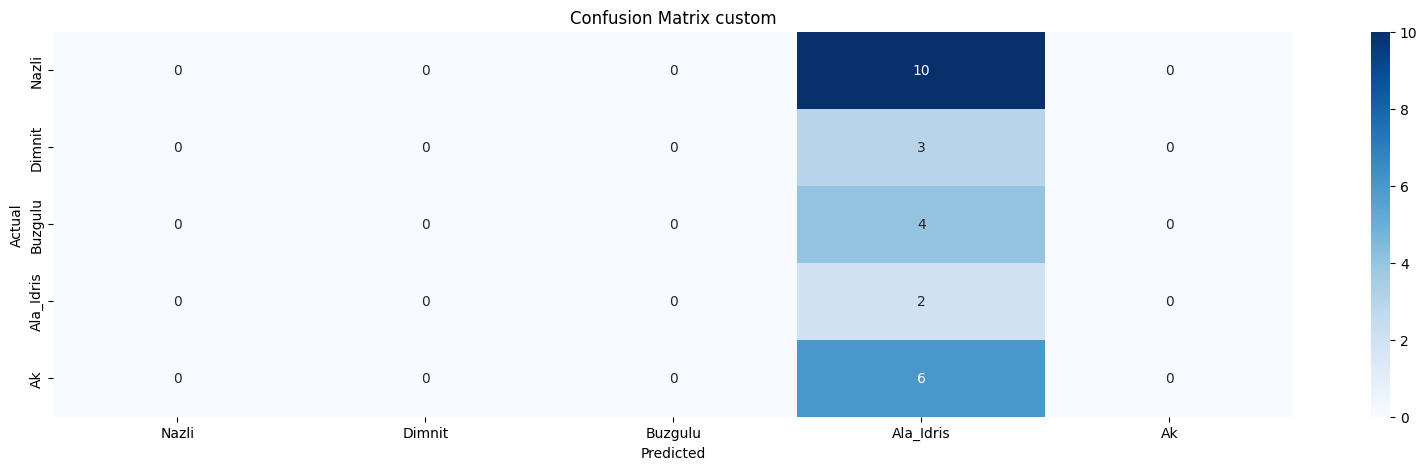

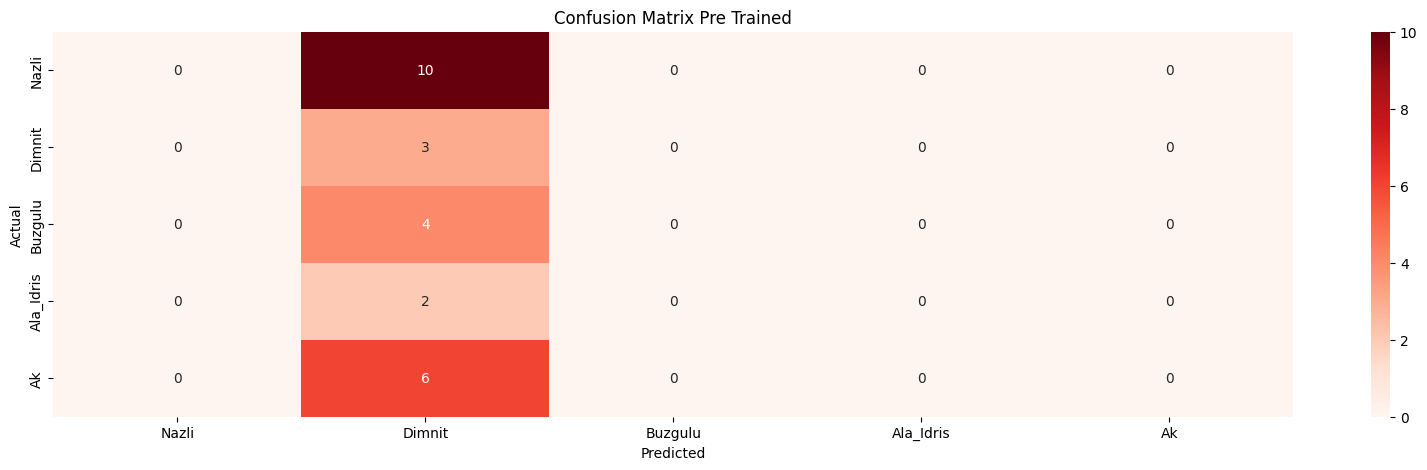

In [63]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_true1, y_pred_classes1)
cm2 = confusion_matrix(y_true2, y_pred_classes2)

plt.figure(figsize=(20, 5))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=flag_types, yticklabels=flag_types)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix custom')
plt.show()

plt.figure(figsize=(20, 5))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Reds', xticklabels=flag_types, yticklabels=flag_types)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Pre Trained')
plt.show()